| **Inicio** | **atrás 10** | **Siguiente 12** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./10_Matematicas_para_el_aprendizaje_automatico_Calculo_multivariante.ipynb)| [⏩](./12_Matematicas_para_el_aprendizaje_automatico_PCA.ipynb)|

# **11. Matemáticas para el aprendizaje automático: Cálculo multivariante**

## **11.1 Regresión**

Para optimizar los parámetros de ajuste de una función de ajuste al mejor ajuste para unos datos, necesitamos una forma de definir lo bueno que es nuestro ajuste. Esta bondad de ajuste se denomina chi-cuadrado, que aplicaremos primero al ajuste de una línea recta: la regresión lineal. Después veremos cómo optimizar nuestra función de ajuste mediante chi-cuadrado en el caso general utilizando el método de descenso de gradiente. Por último, veremos cómo hacer esto fácilmente en Python en sólo unas pocas líneas de código, lo que cerrará el curso.

### **11.1.1 Regresión lineal simple**

La **regresión lineal simple** es un método estadístico que se utiliza para modelar la relación entre una variable dependiente $(y)$ y una variable independiente $(x)$. Este método asume que la relación entre las dos variables es lineal, es decir, se puede describir mediante una línea recta. Es una de las técnicas de análisis predictivo más básicas y comúnmente usadas debido a su simplicidad y eficacia en proporcionar resultados rápidos para relaciones lineales.

**Conceptos Básicos de la Regresión Lineal Simple**

**Modelo Matemático**

El modelo de regresión lineal simple se puede expresar con la siguiente ecuación:

$y = \beta_0 + \beta_1 x + \epsilon$

donde:

- $(y)$ es la variable dependiente.

- $(x)$ es la variable independiente.

- $(\beta_0)$ es el término de intercepción, que representa el valor de $(y)$ cuando $(x = 0)$.

- $(\beta_1)$ es el coeficiente de la pendiente, que indica cómo cambia $(y)$ con una unidad de cambio en $(x)$.

- $(\epsilon)$ es el término del error, que captura todas las otras influencias en $(y)$ que no son explicadas por $(x)$.

**Estimación de los Coeficientes**

Los coeficientes $(\beta_0)$ y $(\beta_1)$ se suelen estimar usando el método de **mínimos cuadrados**, que minimiza la suma de los cuadrados de los errores (diferencia entre los valores observados y los valores predichos por el modelo).

**Ejemplo Práctico: Datos de Altura y Peso**

Supongamos que queremos modelar la relación entre el peso $(y)$ de las personas y su altura $(x)$.

**Datos de Ejemplo**

Para simplificar, utilizaremos datos ficticios que representan la altura (en centímetros) y el peso (en kilogramos) de varias personas:

| Altura (cm) | Peso (kg) |
|-------------|-----------|
| 150         | 50        |
| 160         | 60        |
| 170         | 65        |
| 180         | 75        |
| 190         | 80        |

**Código Python para Regresión Lineal Simple**

Vamos a usar `numpy` para realizar una regresión lineal simple:

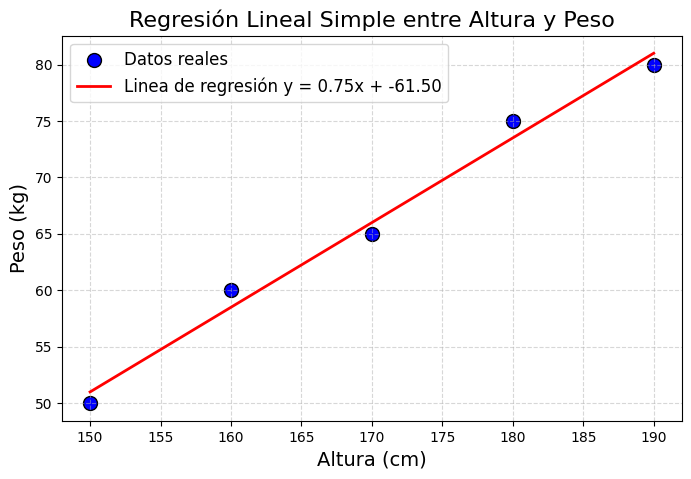

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
X = np.array([150, 160, 170, 180, 190])  # altura
Y = np.array([50, 60, 65, 75, 80])       # peso

# Ajustar el modelo de regresión lineal
coeficientes = np.polyfit(X, Y, 1)  # Esto devuelve [pendiente, intercepción]
pendiente, intercepcion = coeficientes

# Función para calcular los valores de y basados en el modelo de regresión lineal
def modelo_lineal(x):
    return pendiente * x + intercepcion

# Valores de y predichos
Y_pred = modelo_lineal(X)

# Visualización de los datos y la línea de regresión
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, color='blue', label='Datos reales', marker='o', s=100, edgecolor='black')  # Cambio de marcador y tamaño
plt.plot(X, Y_pred, color='red', label=f'Linea de regresión y = {pendiente:.2f}x + {intercepcion:.2f}', linewidth=2)  # Aumento del grosor de línea
plt.title('Regresión Lineal Simple entre Altura y Peso', fontsize=16)  # Aumento del tamaño de fuente del título
plt.xlabel('Altura (cm)', fontsize=14)  # Aumento del tamaño de fuente del eje x
plt.ylabel('Peso (kg)', fontsize=14)    # Aumento del tamaño de fuente del eje y
plt.legend(fontsize=12)                 # Aumento del tamaño de fuente de la leyenda
plt.grid(True, linestyle='--', alpha=0.5)  # Cambio de estilo de cuadrícula y opacidad
plt.show()

**Conclusión**

La regresión lineal simple es una herramienta estadística fundamental que proporciona una manera efectiva y eficiente de predecir una variable dependiente basada en el valor de una variable independiente. Su simplicidad y la capacidad de proporcionar insights rápidos sobre la relación entre variables la convierten en una técnica predilecta en muchos campos, desde la economía y la sociología hasta la ciencia de datos y la ingeniería biomédica.

### **11.1.2 Mínimos cuadrados no lineales generales**

Los **mínimos cuadrados no lineales generales** son una extensión del método de mínimos cuadrados utilizado para ajustar modelos no lineales a datos. Mientras que los mínimos cuadrados lineales se usan para modelos donde la relación entre las variables independientes y la variable dependiente puede ser descrita por una línea recta, los mínimos cuadrados no lineales se emplean cuando esta relación es más compleja y no lineal.

**Concepto de Mínimos Cuadrados No Lineales**

Este método busca minimizar la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por un modelo no lineal. Es decir, si tenemos un conjunto de observaciones $(y_i)$ y un modelo $f(x_i, \boldsymbol{\beta})$ que depende de parámetros no lineales $(\boldsymbol{\beta})$, el objetivo es encontrar los valores de $(\boldsymbol{\beta})$ que minimicen:

$S(\boldsymbol{\beta}) = \sum_{i=1}^n [y_i - f(x_i, \boldsymbol{\beta})]^2$

**Ejemplo Práctico: Modelo Exponencial**

Supongamos que queremos ajustar un modelo exponencial de la forma $y = a \cdot e^{b \cdot x}$ a un conjunto de datos. Este es un ejemplo clásico de un modelo no lineal.

**Datos de Ejemplo**

Imaginemos que tenemos los siguientes datos, que podrían representar, por ejemplo, el crecimiento de una población de bacterias en función del tiempo:

| Tiempo (x) | Población (y) |
|------------|---------------|
| 1          | 150           |
| 2          | 200           |
| 3          | 300           |
| 4          | 500           |
| 5          | 800           |

**Formulación del Modelo**

El modelo que queremos ajustar es:

$y = a \cdot e^{b \cdot x}$

donde $(a)$ y $(b)$ son parámetros que necesitamos estimar usando mínimos cuadrados no lineales.

**Código Python y Visualización**

Para ajustar este modelo y visualizarlo, podemos usar la librería `scipy.optimize`, que incluye funciones para optimización no lineal.

Estimación de parámetros: a = 79.74, b = 0.46


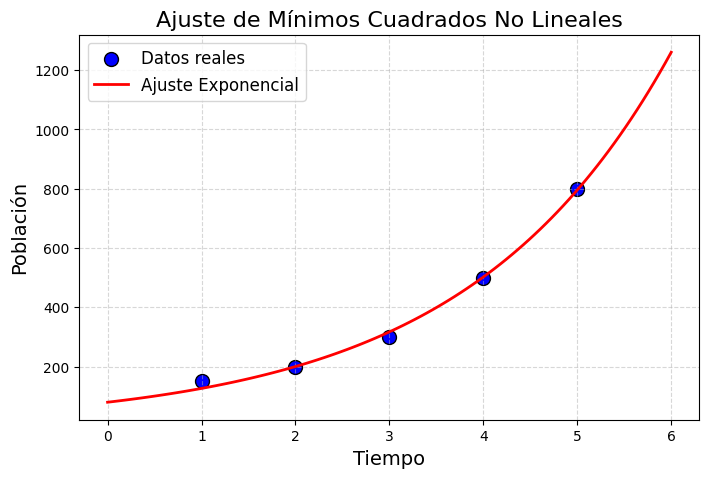

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definir la función del modelo
def modelo_exponencial(x, a, b):
    return a * np.exp(b * x)

# Datos de ejemplo
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([150, 200, 300, 500, 800])

# Ajustar el modelo exponencial a los datos
params, cov = curve_fit(modelo_exponencial, x_data, y_data, p0=[100, 0.1])

# Imprimir los parámetros estimados
print(f"Estimación de parámetros: a = {params[0]:.2f}, b = {params[1]:.2f}")

# Generar puntos x para la línea de ajuste
x_fit = np.linspace(0, 6, 100)
y_fit = modelo_exponencial(x_fit, *params)

# Visualización
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, color='blue', label='Datos reales', marker='o', s=100, edgecolor='black')  # Cambio de marcador y tamaño
plt.plot(x_fit, y_fit, 'r-', label='Ajuste Exponencial', linewidth=2)  # Aumento del grosor de línea
plt.title('Ajuste de Mínimos Cuadrados No Lineales', fontsize=16)  # Aumento del tamaño de fuente del título
plt.xlabel('Tiempo', fontsize=14)  # Aumento del tamaño de fuente del eje x
plt.ylabel('Población', fontsize=14)  # Aumento del tamaño de fuente del eje y
plt.legend(fontsize=12)  # Aumento del tamaño de fuente de la leyenda
plt.grid(True, linestyle='--', alpha=0.5)  # Cambio de estilo de cuadrícula y opacidad
plt.show()

**Conclusión**

Los mínimos cuadrados no lineales son una herramienta esencial en la caja de herramientas estadísticas para ajustar modelos no lineales a datos. Este método permite a los investigadores y científicos describir fenómenos complejos con modelos que capturan la no linealidad inherente a muchos procesos biológicos, físicos y económicos. Su aplicación práctica se extiende desde la biología y la medicina hasta la economía y la física, proporcionando una base sólida para la inferencia y la predicción basadas en datos empíricos.

### **11.1.3 El análisis de regresión por mínimos cuadrados en la práctica**

El **análisis de regresión por mínimos cuadrados** es un método estadístico fundamental para determinar la línea o curva que mejor se ajusta a un conjunto de puntos de datos. Este método se utiliza en un amplio rango de campos, desde economía hasta ingeniería y ciencia de datos, para modelar relaciones entre variables y hacer predicciones.

**Principios Básicos del Análisis de Regresión por Mínimos Cuadrados**

El objetivo de la regresión por mínimos cuadrados es minimizar la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por la modelo. Para un modelo lineal simple, la fórmula es:

$y = \beta_0 + \beta_1 x + \epsilon$


donde $(y)$ es la variable dependiente, $(x)$ es la variable independiente, $(\beta_0)$ es la intercepción, $(\beta_1)$ es la pendiente, y $(\epsilon)$ es el error o residuo de la predicción.

**Ejemplo Práctico: Regresión Lineal**

Supongamos que tenemos datos sobre las ventas de un producto en función de su presupuesto de marketing. Queremos establecer una relación lineal entre el 'Presupuesto de marketing' (variable independiente) y 'Ventas' (variable dependiente).

**Datos de Ejemplo**

| Presupuesto de marketing (miles) | Ventas (miles de unidades) |
|----------------------------------|----------------------------|
| 20                               | 92                         |
| 40                               | 150                        |
| 60                               | 192                        |
| 80                               | 210                        |
| 100                              | 250                        |

**Código Python para Regresión Lineal y Visualización**

Vamos a usar `numpy` y `matplotlib` para realizar un análisis de regresión y visualizar los resultados:

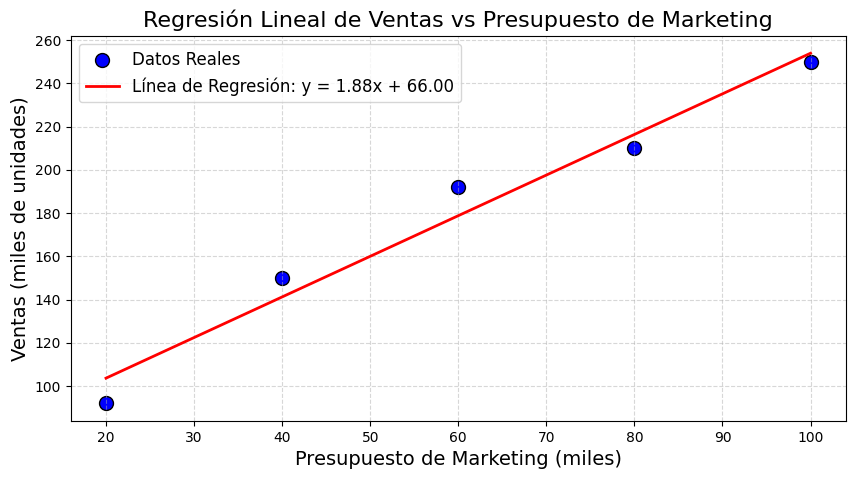

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
X = np.array([20, 40, 60, 80, 100])  # Presupuesto de marketing
Y = np.array([92, 150, 192, 210, 250])  # Ventas

# Calculando los coeficientes de la regresión lineal
coeficientes = np.polyfit(X, Y, 1)  # Polyfit realiza una regresión lineal
pendiente, intercepcion = coeficientes

# Función para calcular y
def modelo_lineal(x):
    return pendiente * x + intercepcion

# Generar valores para la línea de ajuste
x_line = np.linspace(min(X), max(X), 100)
y_line = modelo_lineal(x_line)

# Visualización de datos y línea de regresión
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, color='blue', label='Datos Reales', marker='o', s=100, edgecolor='black')  # Cambio de marcador y tamaño
plt.plot(x_line, y_line, color='red', label=f'Línea de Regresión: y = {pendiente:.2f}x + {intercepcion:.2f}', linewidth=2)  # Aumento del grosor de línea
plt.title('Regresión Lineal de Ventas vs Presupuesto de Marketing', fontsize=16)  # Aumento del tamaño de fuente del título
plt.xlabel('Presupuesto de Marketing (miles)', fontsize=14)  # Aumento del tamaño de fuente del eje x
plt.ylabel('Ventas (miles de unidades)', fontsize=14)  # Aumento del tamaño de fuente del eje y
plt.legend(fontsize=12)  # Aumento del tamaño de fuente de la leyenda
plt.grid(True, linestyle='--', alpha=0.5)  # Cambio de estilo de cuadrícula y opacidad
plt.show()

**Discusión**

Este ejemplo muestra cómo el modelo lineal simple proporciona una herramienta efectiva para predecir las ventas basadas en el presupuesto de marketing. La línea roja en la gráfica representa el mejor ajuste lineal a los datos, mostrando cómo se espera que aumenten las ventas con aumentos en el presupuesto de marketing.

**Conclusiones**

El análisis de regresión por mínimos cuadrados es un pilar en el análisis estadístico y predicciones precisas en diversas áreas de aplicación. Ofrece un método claro y directo para entender y modelar las relaciones entre variables, lo que es crucial para la toma de decisiones basada en datos. Además, los residuos de esta regresión pueden ser analizados para mejorar el modelo y verificar la adecuación de los supuestos estadísticos subyacentes, como la homoscedasticidad y la normalidad de los errores.

### **11.1.4 Regresión lineal**

La **regresión lineal** es un método estadístico que se utiliza para estudiar la relación entre variables cuantitativas. Es uno de los modelos más simples y ampliamente usados en análisis predictivo, especialmente cuando se quiere entender o predecir el valor de una variable dependiente (o variable de respuesta) a partir de una o más variables independientes (o predictores).

**Tipos de Regresión Lineal**

1. **Regresión Lineal Simple**: Involucra solo una variable independiente para predecir la variable dependiente.

2. **Regresión Lineal Múltiple**: Utiliza dos o más variables independientes para predecir la variable dependiente.

**Principios Básicos de la Regresión Lineal Simple**

La ecuación de una regresión lineal simple se puede representar como:

$y = \beta_0 + \beta_1x + \epsilon$


donde:

- $(y)$ es la variable dependiente.

- $(x)$ es la variable independiente.

- $(\beta_0)$ es el intercepto (el valor de $(y)$ cuando $(x = 0)$).

- $(\beta_1)$ es la pendiente de la línea (el cambio en $(y)$ por cada unidad de cambio en $(x)$).

- $(\epsilon)$ es el término de error que representa la variación en $(y)$ no explicada por $(x)$.

**Ejemplo Práctico: Regresión Lineal Simple**

**Contexto**

Supongamos que un investigador quiere estudiar la relación entre la temperatura (variable independiente) y el consumo de helados (variable dependiente).

**Datos de Ejemplo**

| Temperatura (°C) | Consumo de helados (Unidades) |
|------------------|-------------------------------|
| 20               | 80                            |
| 25               | 100                           |
| 30               | 120                           |
| 35               | 140                           |
| 40               | 160                           |

**Implementación en Python**

Utilizaremos `numpy` para realizar la regresión lineal y `matplotlib` para visualizar los datos y el modelo lineal.

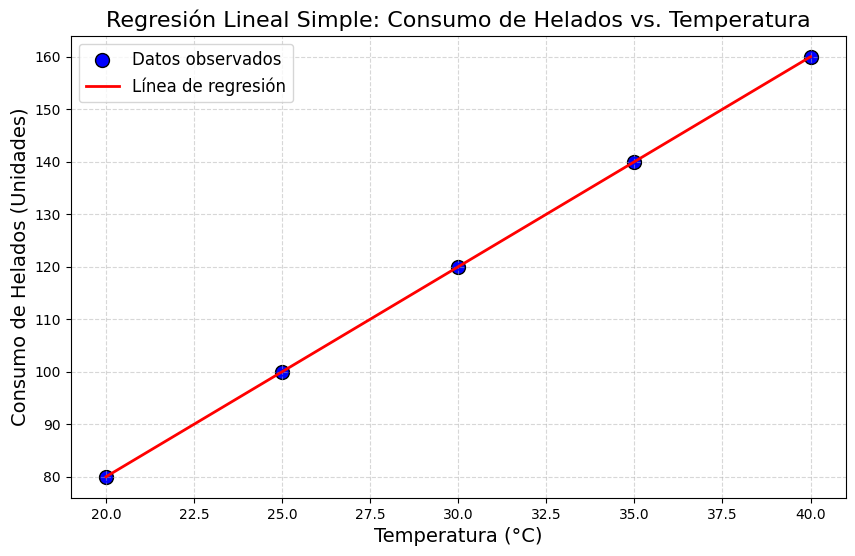

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
temperaturas = np.array([20, 25, 30, 35, 40])
consumo_helados = np.array([80, 100, 120, 140, 160])

# Ajustar la regresión lineal
coeficientes = np.polyfit(temperaturas, consumo_helados, 1)
modelo = np.poly1d(coeficientes)

# Generar datos para la línea de ajuste
temperaturas_linea = np.linspace(20, 40, 100)
consumo_predicho = modelo(temperaturas_linea)

# Visualización
plt.figure(figsize=(10, 6))  # Aumentar el tamaño de la figura
plt.scatter(temperaturas, consumo_helados, color='blue', label='Datos observados', marker='o', s=100, edgecolor='black')  # Cambiar el tamaño y el tipo de marcador
plt.plot(temperaturas_linea, consumo_predicho, 'r-', label='Línea de regresión', linewidth=2)  # Aumentar el grosor de la línea
plt.title('Regresión Lineal Simple: Consumo de Helados vs. Temperatura', fontsize=16)  # Aumentar el tamaño de fuente del título
plt.xlabel('Temperatura (°C)', fontsize=14)  # Aumentar el tamaño de fuente del eje x
plt.ylabel('Consumo de Helados (Unidades)', fontsize=14)  # Aumentar el tamaño de fuente del eje y
plt.legend(fontsize=12)  # Aumentar el tamaño de fuente de la leyenda
plt.grid(True, linestyle='--', alpha=0.5)  # Cambiar el estilo de la cuadrícula y la opacidad
plt.show()

**Discusión**

La línea roja en el gráfico representa la relación lineal entre la temperatura y el consumo de helados. Según el modelo, a medida que aumenta la temperatura, también lo hace el consumo de helados. La pendiente de la línea indica la tasa de aumento del consumo de helados por cada grado de aumento en la temperatura.

**Conclusiones**

La regresión lineal es una herramienta esencial para la predicción y el análisis en muchos campos, como la economía, la biología, la ingeniería y más. Su simplicidad y la facilidad de interpretación de sus resultados hacen que sea particularmente atractiva para el análisis preliminar de relaciones lineales entre variables. Además, los residuos del modelo (la diferencia entre los valores observados y los predichos) pueden ser analizados para evaluar la adecuación del modelo, permitiendo a los investigadores verificar supuestos como la homogeneidad de la varianza y la independencia de los errores.

### **11.1.5 Ajuste de una función no lineal**

El **ajuste de una función no lineal** es un proceso estadístico utilizado para modelar la relación entre un conjunto de datos y una función matemática que es no lineal en sus parámetros. A diferencia de la regresión lineal, donde la relación entre las variables independientes y dependientes se modela como una línea recta, el ajuste no lineal puede involucrar curvas exponenciales, logarítmicas, trigonométricas, polinomiales de orden superior, y más.

**Conceptos Básicos del Ajuste de Funciones No Lineales**

El objetivo es encontrar el conjunto de parámetros que minimiza la diferencia entre los valores predichos por el modelo y los valores observados. Este proceso implica optimizar los parámetros de la función modelo para que la suma de los cuadrados de las diferencias (residuos) entre los datos observados y los datos modelados sea lo más pequeña posible.

**Ejemplo Práctico: Ajuste de un Modelo Exponencial**

Supongamos que estamos interesados en modelar el crecimiento de una población de bacterias que se ajusta a una curva de crecimiento exponencial. La función modelo podría ser:

$y = a \cdot e^{b \cdot x}$

donde:

- $(y)$ es el tamaño de la población en el tiempo $(x)$.

- $(a)$ es el tamaño de la población al tiempo $(x = 0)$.

- $(b)$ es la tasa de crecimiento de la población.

**Datos de Ejemplo**

| Día (x) | Población (y) |
|---------|---------------|
| 0       | 100           |
| 1       | 150           |
| 2       | 225           |
| 3       | 338           |
| 4       | 507           |

**Código Python para el Ajuste de la Función No Lineal y Visualización**

Utilizaremos `scipy.optimize.curve_fit`, una función que permite el ajuste de curvas no lineales de manera eficiente.

Parámetros ajustados: a = 99.96, b = 0.41


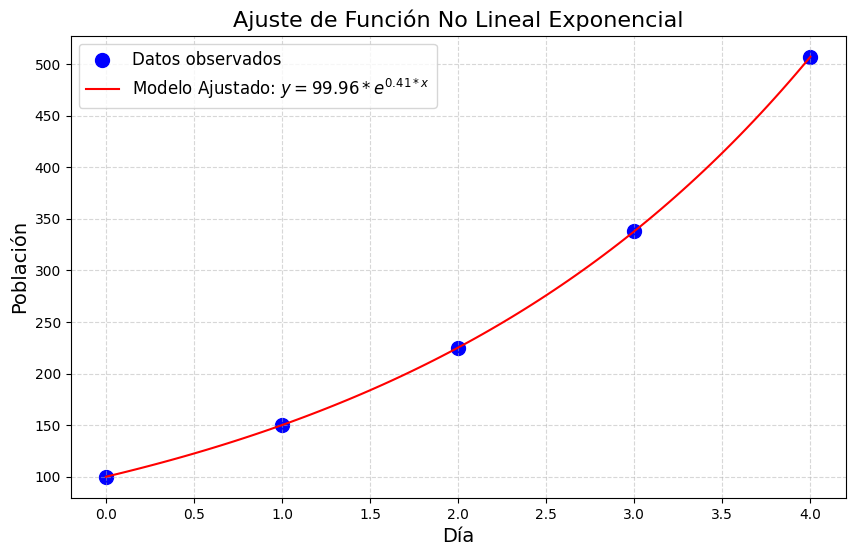

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definir la función modelo para el ajuste
def modelo_exponencial(x, a, b):
    return a * np.exp(b * x)

# Datos observados
x_data = np.array([0, 1, 2, 3, 4])
y_data = np.array([100, 150, 225, 338, 507])

# Ajuste de la curva
params, covariance = curve_fit(modelo_exponencial, x_data, y_data, p0=[100, 0.5])

# Parámetros ajustados
a, b = params
print(f"Parámetros ajustados: a = {a:.2f}, b = {b:.2f}")

# Generar datos x para la curva ajustada
x_model = np.linspace(0, 4, 100)
y_model = modelo_exponencial(x_model, a, b)

# Visualización
plt.figure(figsize=(10, 6))  # Aumentar el tamaño de la figura
plt.scatter(x_data, y_data, color='blue', label='Datos observados', marker='o', s=100)  # Cambiar el tamaño y el tipo de marcador
plt.plot(x_model, y_model, 'r-', label=f'Modelo Ajustado: $y = {a:.2f} * e^{{ {b:.2f} * x}}$')  # Utilizar LaTeX para el formato de la etiqueta
plt.title('Ajuste de Función No Lineal Exponencial', fontsize=16)  # Aumentar el tamaño de fuente del título
plt.xlabel('Día', fontsize=14)  # Aumentar el tamaño de fuente del eje x
plt.ylabel('Población', fontsize=14)  # Aumentar el tamaño de fuente del eje y
plt.legend(fontsize=12)  # Aumentar el tamaño de fuente de la leyenda
plt.grid(True, linestyle='--', alpha=0.5)  # Cambiar el estilo de la cuadrícula y la opacidad
plt.show()

**Discusión**

En este ejemplo, el modelo exponencial ajusta bien los datos observados, lo que indica que el crecimiento de la población de bacterias es exponencial como se esperaba. Los parámetros $(a)$ y $(b)$ optimizados por `curve_fit` muestran el tamaño inicial de la población y la tasa de crecimiento, respectivamente.

**Conclusión**

El ajuste de funciones no lineales es crucial en muchos campos científicos y de ingeniería para modelar comportamientos que las relaciones lineales no pueden capturar adecuadamente. El proceso de ajuste no lineal puede ser más complejo que el lineal debido a problemas como la existencia de múltiples mínimos locales y la sensibilidad a los valores iniciales de los parámetros. Sin embargo, con las herramientas adecuadas y una buena comprensión del proceso, es posible obtener modelos precisos y útiles para la predicción y el análisis de fenómenos complejos.

### **11.1.6 Ajuste de la distribución de los datos de alturas**

El **ajuste de la distribución de los datos de altura** implica modelar la distribución estadística de las alturas de individuos utilizando una función de probabilidad que mejor se ajuste a los datos observados. Comúnmente, las alturas humanas se modelan utilizando distribuciones como la normal (gaussiana), debido a que tienden a seguir un patrón simétrico alrededor de una media central, con variabilidad estandarizada en poblaciones específicas.

**Fundamentos Estadísticos**

La distribución normal es caracterizada por dos parámetros:

- **Media $(\mu)$**: El promedio de todos los valores de la muestra.

- **Desviación estándar $(\sigma)$**: Mide la dispersión de los datos respecto a la media.

La fórmula de la densidad de la distribución normal es:

$f(x|\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

**Ejemplo Práctico: Ajuste de Datos de Altura**

Supongamos que tenemos un conjunto de datos de alturas recogidos de una población y queremos ajustar estos datos a una distribución normal para analizar características de esta población.

**Datos de Ejemplo**

Para este ejemplo, generaremos datos sintéticos de altura que siguen aproximadamente una distribución normal.

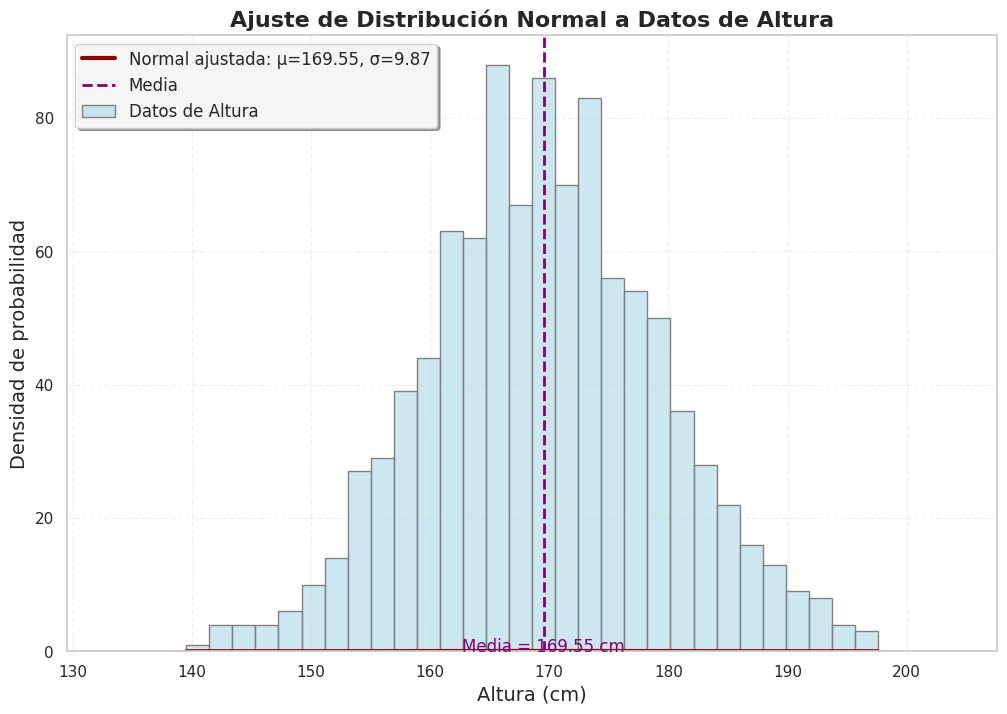

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Configurar el estilo de seaborn
sns.set_theme(style="whitegrid")  # Cambio a un fondo blanco para mayor claridad

# Generar datos sintéticos de altura
np.random.seed(0)
alturas = np.random.normal(loc=170, scale=10, size=1000)  # Datos de altura

# Ajuste de los datos a una distribución normal
media, desviacion = norm.fit(alturas)

# Crear rango de valores para el ajuste
valores = np.linspace(min(alturas), max(alturas), 100)
ajuste_pdf = norm.pdf(valores, media, desviacion)

# Creación de la visualización
plt.figure(figsize=(12, 8))
sns.histplot(alturas, bins=30, kde=False, color="lightblue", edgecolor="gray", alpha=0.6, label='Datos de Altura')
plt.plot(valores, ajuste_pdf, color='darkred', linestyle='-', linewidth=3, label=f'Normal ajustada: μ={media:.2f}, σ={desviacion:.2f}')
plt.axvline(media, color='purple', linestyle='--', linewidth=2, label='Media')
plt.title('Ajuste de Distribución Normal a Datos de Altura', fontsize=16, fontweight='bold')
plt.xlabel('Altura (cm)', fontsize=14)
plt.ylabel('Densidad de probabilidad', fontsize=14)
plt.legend(loc='upper left', fontsize=12, frameon=True, framealpha=0.9, shadow=True)
plt.grid(True, linestyle='--', alpha=0.3)  # Estilo de cuadrícula suave
plt.text(media, 0.02, f'Media = {media:.2f} cm', fontsize=12, color='purple', ha='center')
plt.xlim([min(alturas)-10, max(alturas)+10])  # Ajustar límites para incluir todo el rango
plt.show()

**Explicación del Código**

1. **Generación de Datos**: Creamos un conjunto de datos sintéticos que simulan alturas normales distribuidas alrededor de 170 cm con una desviación estándar de 10 cm.

2. **Ajuste de la Distribución**: Utilizamos `norm.fit` de SciPy para encontrar los parámetros de la distribución normal que mejor se ajustan a nuestros datos.

3. **Visualización**: Mostramos los datos en un histograma y superponemos la curva de densidad de probabilidad de la distribución normal ajustada.

**Conclusiones**

El ajuste de la distribución de datos de altura a una distribución normal es un procedimiento común en estadística que permite a los investigadores entender mejor las características de la población, como la media y la variabilidad. Este modelo puede ser útil en diversas aplicaciones, desde la planificación de necesidades de salud hasta el diseño de productos y más. Además, proporciona una base para realizar pruebas estadísticas adicionales y para la toma de decisiones basadas en datos.

| **Inicio** | **atrás 10** | **Siguiente 12** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./10_Matematicas_para_el_aprendizaje_automatico_Calculo_multivariante.ipynb)| [⏩](./12_Matematicas_para_el_aprendizaje_automatico_PCA.ipynb)|